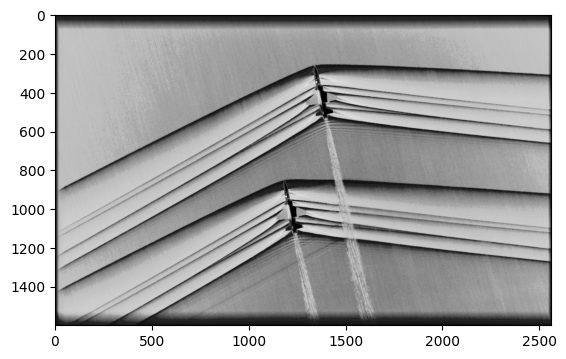

Dimension of X : 2
Shape of X     : (1600, 2560)
Size of X      : 4096000
Min(X)         : 0
Max(X)         : 255
X.             :
 [[22 21 21 ... 18 18 18]
 [21 21 21 ... 18 18 18]
 [23 23 23 ... 18 18 18]
 ...
 [18 18 18 ... 23 24 24]
 [18 18 18 ... 23 23 23]
 [18 18 18 ... 25 24 23]]
Shape of U     : (1600, 1600)
Shape of S     : (1600,)
Shape of VT    : (1600, 2560)
np.diag(S)     : (1600, 1600)


In [7]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from PIL import Image
from urllib.request import urlopen



url = "https://upload.wikimedia.org/wikipedia/commons/9/94/F4_p3_rgb_planedrop.jpg"

image = Image.open(urlopen(url))

image = image.convert('L')

X = np.array(image)

plt.imshow(X, cmap='gray')

plt.show()

print("Dimension of X :", X.ndim)
print("Shape of X     :", X.shape)
print("Size of X      :", X.size)
print("Min(X)         :", np.min(X))
print("Max(X)         :", np.max(X))
print("X.             :\n",X)

U, S, VT = np.linalg.svd(X, full_matrices=False)
print("Shape of U     :", U.shape)
print("Shape of S     :", S.shape)
print("Shape of VT    :", VT.shape)

S = np.diag(S)
print("np.diag(S)     :", S.shape)



%%%%%%%%%%%%%%%%%%%%%
--------------r: 10
Shape of U     : (1600, 10)
Shape of S     : (10, 10)
Shape of VT    : (10, 2560)
Shape of Xaprx : (1600, 2560)


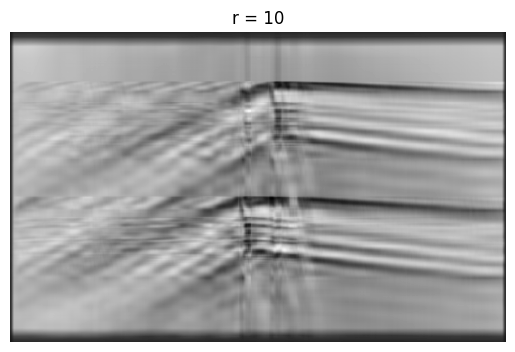

%%%%%%%%%%%%%%%%%%%%%
--------------r: 20
Shape of U     : (1600, 20)
Shape of S     : (20, 20)
Shape of VT    : (20, 2560)
Shape of Xaprx : (1600, 2560)


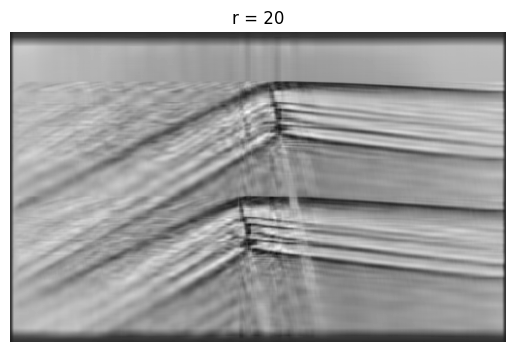

%%%%%%%%%%%%%%%%%%%%%
--------------r: 40
Shape of U     : (1600, 40)
Shape of S     : (40, 40)
Shape of VT    : (40, 2560)
Shape of Xaprx : (1600, 2560)


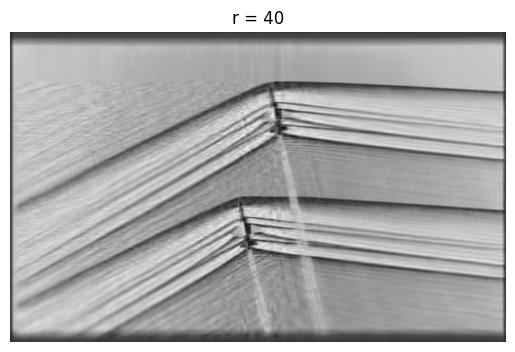

In [8]:

j = 0
for r in (10, 20, 40):
    Xapprox =  U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    print("%%%%%%%%%%%%%%%%%%%%%")
    print("--------------r:",r)
    print("Shape of U     :", U[:,:r].shape)
    print("Shape of S     :", S[0:r,:r].shape)
    print("Shape of VT    :", VT[:r,:].shape)
    print("Shape of Xaprx :", Xapprox.shape)


    

    plt.figure(j+1)
    j +=1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()       






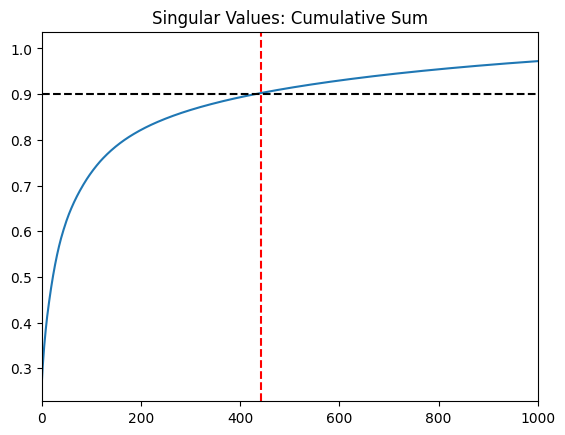

A rank of about 433 is needed to retain 90% of the information


In [9]:

plt.figure(1)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.axvline(443, color='red', linestyle='dashed')
plt.axhline(0.90,color='black', linestyle='dashed')
plt.title('Singular Values: Cumulative Sum')
plt.xlim(0,1000)
plt.show()
print("A rank of about 433 is needed to retain 90% of the information")

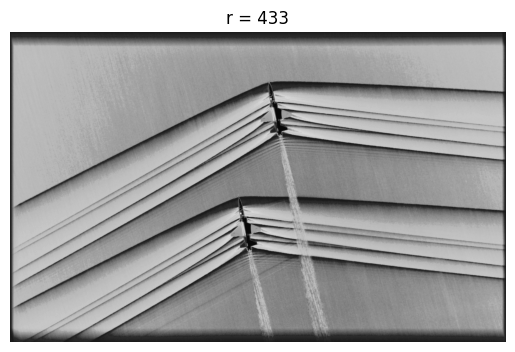

In [11]:
Xapprox =  U[:,:433] @ S[0:433,:433] @ VT[:433,:]
img = plt.imshow(Xapprox)
img.set_cmap('gray')
plt.axis('off')
plt.title('r = ' + str(433))
plt.show()       


U*U^T is rxr check: (1600, 1600)
U^T*U is not rxr check: (17, 17)
UUT will never result in an rxr identity matrix because of the shape.
Ur is equal to 1600xr and transposing that will result in rx1600 which then will multiply to be a 1600x1600
UTU will always result in an rxr identity matrix


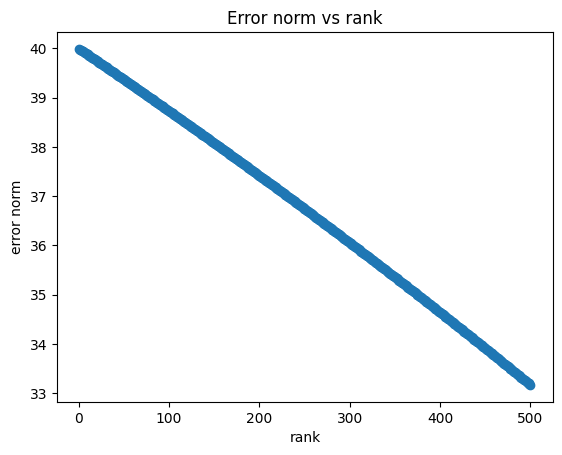

In [10]:

r = 17
Ur = U[:, :r]
UTUTransposeCheck = Ur @ np.transpose(Ur)
print(f"U*U^T is rxr check: {UTUTransposeCheck.shape}")


r = 17
Ur = U[:, :r]
UTUTransposeCheck =np.transpose(Ur) @ Ur 
print(f"U^T*U is not rxr check: {UTUTransposeCheck.shape}")

print("UUT will never result in an rxr identity matrix because of the shape.")
print("Ur is equal to 1600xr and transposing that will result in rx1600 which then will multiply to be a 1600x1600")
print("UTU will always result in an rxr identity matrix")
n = 500
i = 0
error = []
for i in range(1, n+1):
    identityMat = np.eye(i)
    identityMat = np.eye(i)
    Ur = U[:, :i]
    UUT = Ur @ Ur.T
    error.append(np.linalg.norm(UUT - np.eye(UUT.shape[1]), 'fro'))

    
    
plt.plot(range(1,n+1), error, 'o')
plt.xlabel("rank")
plt.ylabel("error norm")
plt.title("Error norm vs rank")
plt.show()
